In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import IPython

In [2]:
import d3py

In [3]:
import networkx as nx    
G=nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(3,2)
G.add_edge(3,4)
G.add_edge(4,2)

In [ ]:
with d3py.NetworkXFigure(G, name="graph",width=200, height=200) as p:
    p += d3py.ForceLayout()
    p.css['.node'] = {'fill': 'blue', 'stroke': 'magenta'}
    #p.save_to_files()
    p.show() 

You can find your chart at http://localhost:8000/graph.html
Ctrl-C to stop serving the chart and quit!


<IPython.core.display.Javascript object>


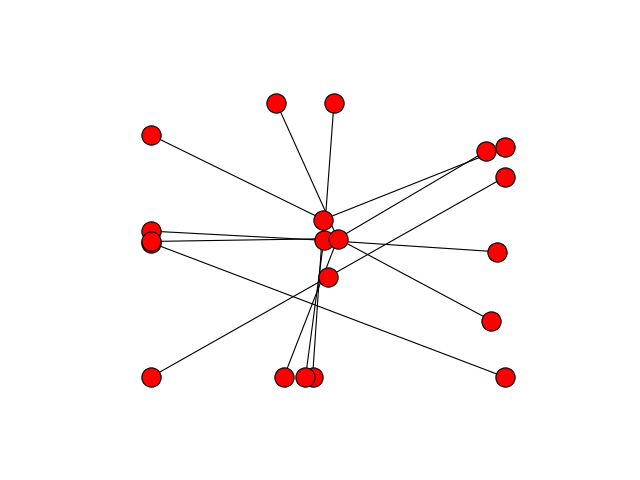

In [7]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time
import random
import networkx as nx    

g = nx.Graph()

def n_drw(ax,g, colors = ['b']):
    g.add_edge(1, random.randint(1, 20))
    nx.draw(g)
    
fig,ax = plt.subplots(1,1)
#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_xlim(0,1)
#ax.set_ylim(0,1)

for f in range(5):
    n_drw(ax, g)
    time.sleep(10)

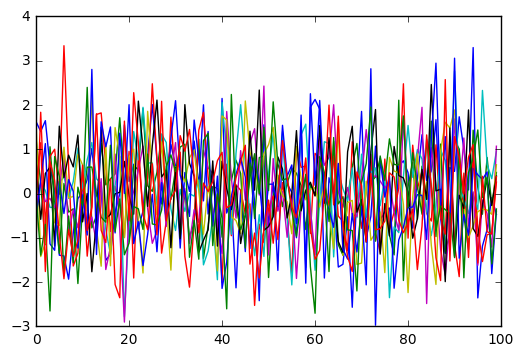

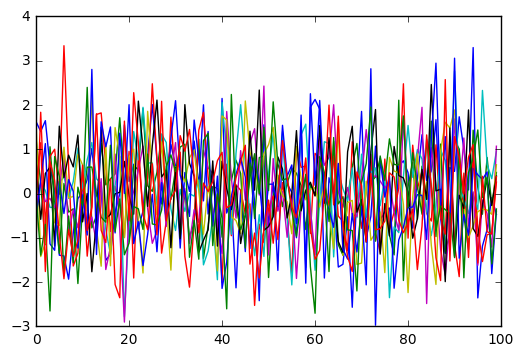

In [8]:
%matplotlib inline
import time
import pylab as pl
from IPython import display
for i in range(10):
    pl.plot(pl.randn(100))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import wx
from matplotlib.backends.backend_wxagg import \
FigureCanvasWxAgg as FigCanvas, \
NavigationToolbar2WxAgg as NavigationToolbar

class NetworkFrame(wx.Frame):
    def __init__(self):
        wx.Frame.__init__(self, None, -1)
        self.panel = wx.Panel(self)
        self.fig = plt.figure()
        self.canvas = FigCanvas(self.panel, -1, self.fig)
        G=nx.house_graph()
    pos={0:(0,0),
        1:(1,0),
        2:(0,1),
        3:(1,1),
        4:(0.5,2.0)}

    nx.draw_networkx_nodes(G,pos,node_size=2000,nodelist=[4])
    nx.draw_networkx_nodes(G,pos,node_size=3000,nodelist=[0,1,2,3],node_color='b')
    nx.draw_networkx_edges(G,pos,alpha=0.5,width=6)
    plt.axis('off')
    self.vbox = wx.BoxSizer(wx.VERTICAL)
    self.vbox.Add(self.canvas, 1, wx.LEFT | wx.TOP | wx.GROW)
    self.toolbar = NavigationToolbar(self.canvas)
    self.vbox.Add(self.toolbar, 0, wx.EXPAND)
    self.panel.SetSizer(self.vbox)
    self.vbox.Fit(self)


    #plt.savefig("house_with_colors.png") # save as png
    #plt.show() # display

if __name__ == '__main__':
  app = wx.PySimpleApp()
  app.frame = NetworkFrame()
  app.frame.Show()
  app.MainLoop()

main()

ImportError: No module named wx

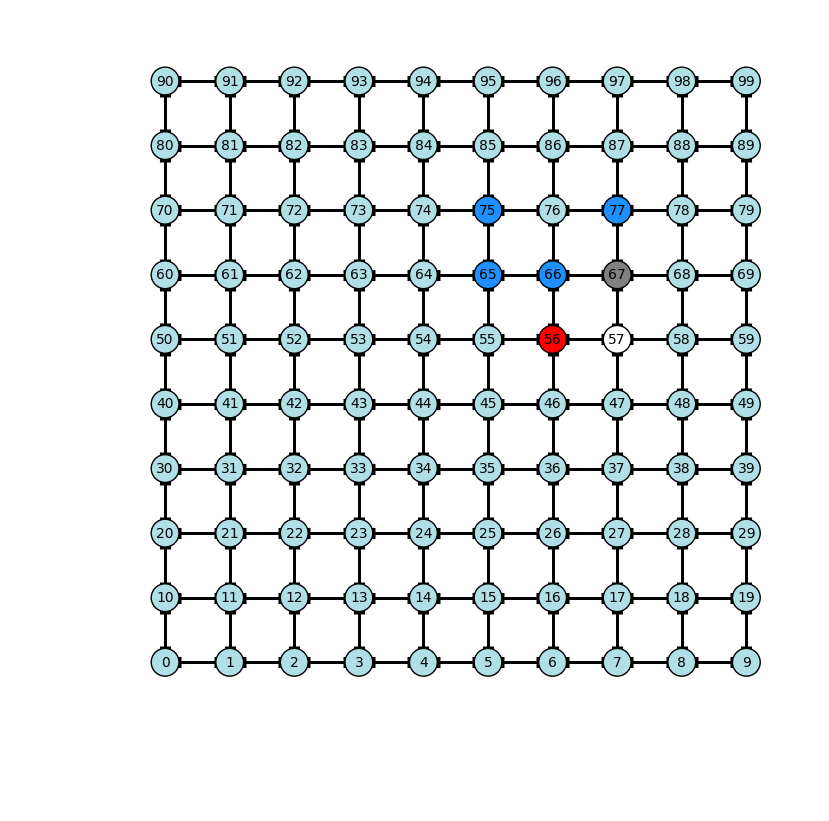

KeyboardInterrupt: 

In [14]:
import math
import queue
import random
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

# plotting function
def get_fig(G,current,pred): 
    nColorList = []
    for i in G.nodes():        
        if i == current: nColorList.append('red')
        elif i==pred: nColorList.append('white')
        elif i==N: nColorList.append('grey')        
        elif node_visited[i]==1:nColorList.append('dodgerblue')
        else: nColorList.append('powderblue')
    plt.figure(figsize=(10,10))
    nx.draw_networkx(G,pos,node_color=nColorList,width=2,node_size=400,font_size=10)
    plt.axis('off')
    plt.show()

clear_output(wait=True)         
get_fig(G,i)
plt.pause(1)    

# graph creation
G=nx.DiGraph()
pos={}
cost={}
for i in range(100):
    x= i % 10
    y= math.floor(i/10)
    pos[i]=(x,y)    
    if i % 10 != 9 and i+1 < 100: 
       cost[(i,i+1)] = random.randint(0,9)
       cost[(i+1,i)] = random.randint(0,9)
    if i+10 < 100: 
       cost[(i,i+10)] = random.randint(0,9)
       cost[(i+10,i)] = random.randint(0,9)
G.add_edges_from(cost)   

# algorithm initialization
lab={}
path={}
node_visited={}
N = random.randint(0,99)
SE = queue.PriorityQueue()
SE.put((0,N))
for i in G.nodes():       
    if i == N: lab[i] = 0        
    else: lab[i] = 9999
    path[i] = None
    node_visited[i] = 0 

# algorithm main loop    
while not SE.empty():
    (l,j) = SE.get()    
    if node_visited[j]==1: continue
    node_visited[j] = 1
    for i in G.predecessors(j):        
        insert_in_SE = 0               
        if lab[i] > cost[(i,j)] + lab[j]:
            lab[i] = cost[(i,j)] + lab[j]
            path[i] = j
            SE.put((lab[i],i))
        clear_output(wait=True)         
        get_fig(G,j,i)
        plt.pause(1)
print('end')

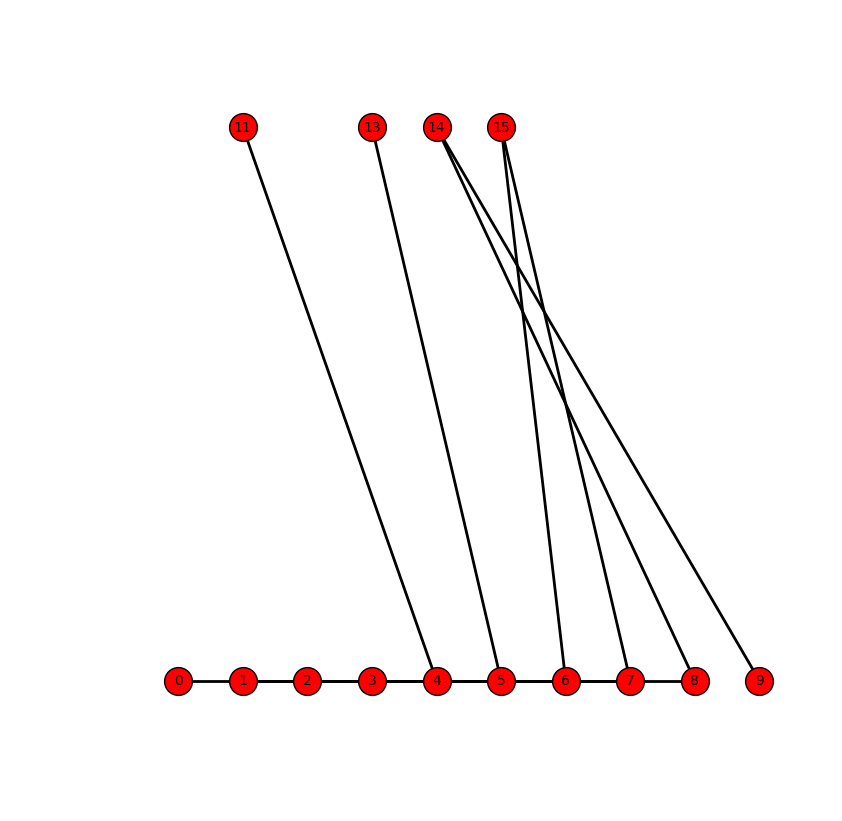

end


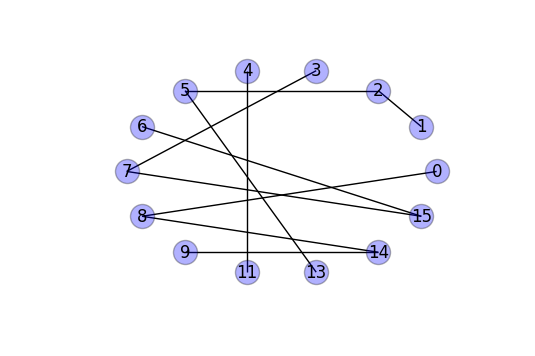

In [24]:
import math
import queue
import random
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

# plotting function
def get_fig(G,i): 
    nColorList = []
    x= i % 10
    y= math.floor(i/10)
    j=random.randint(i, i+10) 
    
    pos[i] = (x,y)
    pos[j] = (j%10,math.floor(j/10))
    G.add_edge(i, j)
    plt.figure(figsize=(10,10))
    nx.draw_networkx(G,
                     pos,
                     #node_color=nColorList,
                     width=2,node_size=400,font_size=10)
    
    plt.axis('off')
    plt.show()

    

# graph creation
G=nx.Graph()
pos={}
cost={}
for i in range(10):
    clear_output(wait=True)         
    get_fig(G,i)
    plt.pause(1)
   
print('end')

graph_pos = nx.shell_layout(G)

nx.draw_networkx_nodes(G, graph_pos, node_size=300, node_color='blue', alpha=0.3)
nx.draw_networkx_edges(G, graph_pos)
nx.draw_networkx_labels(G, graph_pos, font_size=12, font_family='sans-serif')
    
plt.axis('off')
plt.show()
    


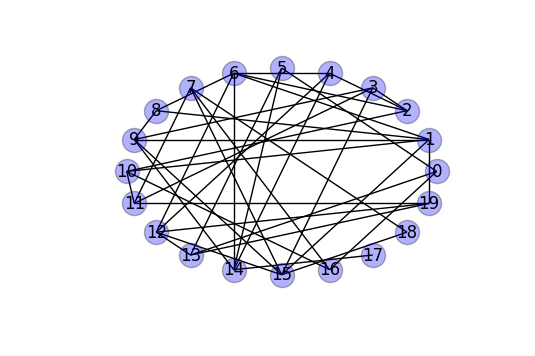

In [27]:
G = nx.erdos_renyi_graph(20, 0.2)

graph_pos = nx.shell_layout(G)


nx.draw_networkx_nodes(G, graph_pos, node_size=300, node_color='blue', alpha=0.3)
nx.draw_networkx_edges(G, graph_pos)
nx.draw_networkx_labels(G, graph_pos, font_size=12, font_family='sans-serif')
    
plt.axis('off')
plt.show()

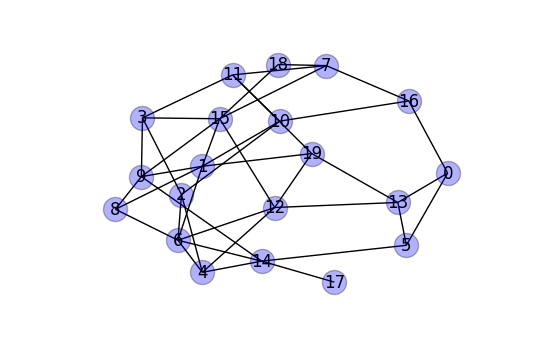

In [31]:
graph_pos = nx.spring_layout(G)


nx.draw_networkx_nodes(G, graph_pos, node_size=300, node_color='blue', alpha=0.3)
nx.draw_networkx_edges(G, graph_pos)
nx.draw_networkx_labels(G, graph_pos, font_size=12, font_family='sans-serif')
    
plt.axis('off')
plt.show()

In [26]:
graph_pos

{0: array([ 1.,  0.]),
 1: array([ 0.95105652,  0.30901699]),
 2: array([ 0.80901699,  0.58778525]),
 3: array([ 0.58778525,  0.80901699]),
 4: array([ 0.30901699,  0.95105652]),
 5: array([  6.12323400e-17,   1.00000000e+00]),
 6: array([-0.30901699,  0.95105652]),
 7: array([-0.58778525,  0.80901699]),
 8: array([-0.80901699,  0.58778525]),
 9: array([-0.95105652,  0.30901699]),
 10: array([ -1.00000000e+00,   1.22464680e-16]),
 11: array([-0.95105652, -0.30901699]),
 12: array([-0.80901699, -0.58778525]),
 13: array([-0.58778525, -0.80901699]),
 14: array([-0.30901699, -0.95105652]),
 15: array([ -1.83697020e-16,  -1.00000000e+00]),
 16: array([ 0.30901699, -0.95105652]),
 17: array([ 0.58778525, -0.80901699]),
 18: array([ 0.80901699, -0.58778525]),
 19: array([ 0.95105652, -0.30901699])}

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


KeyboardInterrupt: 

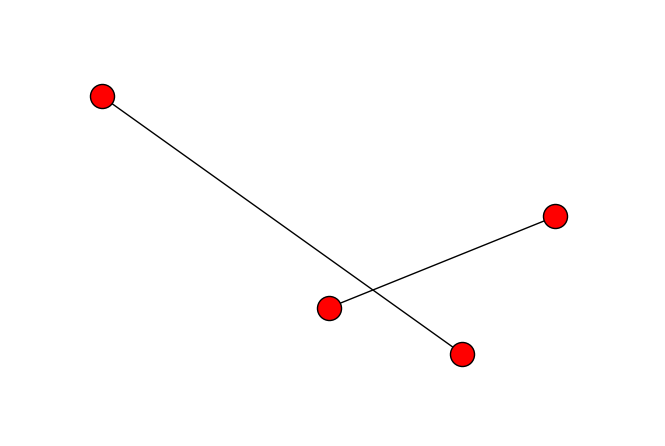

In [6]:
import random
import pylab
from matplotlib.pyplot import pause
import networkx as nx
pylab.ion()

graph = nx.Graph()
node_number = 0
graph.add_node(node_number, Position=(random.randrange(0, 100), random.randrange(0, 100)))

def get_fig():
    global node_number
    node_number += 1
    graph.add_node(node_number, Position=(random.randrange(0, 100), random.randrange(0, 100)))
    graph.add_edge(node_number, random.choice(graph.nodes()))
    fig = pylab.figure()
    nx.draw(graph, pos=nx.get_node_attributes(graph,'Position'))
    return fig

num_plots = 50;
pylab.show()

for i in range(num_plots):

    fig = get_fig()
    fig.canvas.draw()
    pylab.draw()
    pause(2)
    pylab.close(fig)

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/hdalpha/.local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


KeyboardInterrupt: 

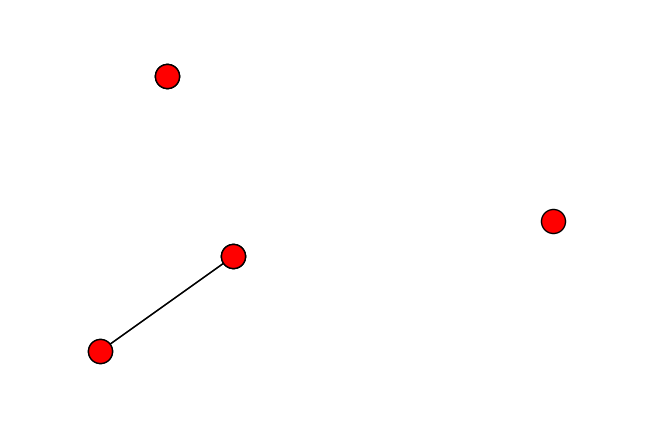

In [9]:
import random
import pylab
from matplotlib.pyplot import pause
import networkx as nx
#pylab.ion()

graph = nx.Graph()
node_number = 0
graph.add_node(node_number, Position=(random.randrange(0, 100), random.randrange(0, 100)))

def get_fig():
    global node_number
    node_number += 1
    graph.add_node(node_number, Position=(random.randrange(0, 100), random.randrange(0, 100)))
    graph.add_edge(node_number, random.choice(graph.nodes()))
    nx.draw(graph, pos=nx.get_node_attributes(graph,'Position'))

num_plots = 50;
plt.show()

for i in range(num_plots):

    get_fig()
    plt.draw()
    pause(2)

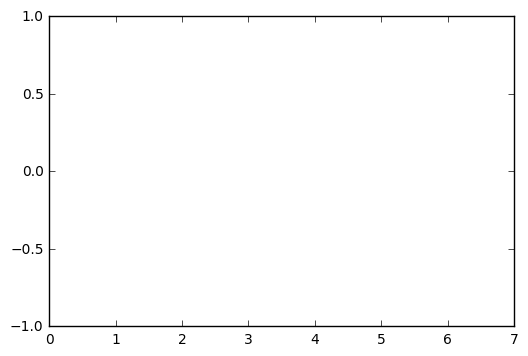

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()